<a href="https://colab.research.google.com/github/mille055/AIPI531/blob/main/AIPI531_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 531
**Homework 3**

Chad Miller


1. Build a pipeline for offline RL using d3rlpy:
Hint: In this homework, you will implement a simple pipeline for offline RL using the APIs provided in d3rlpy repository.
[Required] Train CQL:
- Pick (any) one environment/dataset in d3rlpy
(https://github.com/takuseno/d3rlpy).
- Train your CQL agent with the data from the behavior policy.
- Generate true Q vs training steps (may include different dataset sizes, task difficulties) plots.
- Generate estimated Q vs training steps (may include different dataset sizes, task difficulties) plots.
[Optional] Train OPE (FQE):
- Train OPE (FQE) to evaluate the trained policy.
- Generate estimated Q vs training steps (may include different trained policies) plots.
  
 - Include the true Q in the same plots. [Requirements]:
- Build a pipeline for offline RL (data processing, training, evaluation).
- Compare the true Q value with estimated Q value for both offline RL training and offline evaluation (optional).
[Software Setup for Development]:
1. git clone the d3rlpy source code repo (development version) to your local machine (no need to install it on your local machine). https://d3rlpy.readthedocs.io/en/v1.0.0/installation.ht ml#install-from-source
2. Download the Google Drive Desktop (to sync with your Google Drive). https://www.google.com/drive/download/
3. Sync the cloned d3rlpy code repo (on your local machine) with the one in your Google Drive using Google Drive Desktop.
4. Connect the cloned d3rlpy code repo stored in your Google Drive with your Google Colab notebook.
5. Install the cloned d3rlpy code repo in your Google Drive using Google Colab (install it on Colab).
   
https://d3rlpy.readthedocs.io/en/v1.0.0/installation.ht
ml#install-from-source
6. Use any editor (e.g. Sublime, PyCharm, etc.) for the code implementation (modify the code in the cloned d3rlpy repo on your local machine).
7. Test your implementation and running experiments using Colab.
8. Push your code in the cloned d3rlpy repo on your local machine to your repo in your GitHub account.
[Submission]:
(We don’t need a link to your Google Drive. We only need the link to your GitHub using the Colab notebook)
1. Create a new Colab notebook.
2. !pip install git+”your github URL”
3. Training/testing experiments using the Colab notebook.

# Setup

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [1]:
# installing my fork of the d3rlpy repo which contains modifications for this homework assignment
!pip install git+'https://github.com/mille055/AIPI531-d3rlpy.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mille055/AIPI531-d3rlpy.git to /tmp/pip-req-build-jz_lkev1
  Running command git clone --filter=blob:none --quiet https://github.com/mille055/AIPI531-d3rlpy.git /tmp/pip-req-build-jz_lkev1
  Resolved https://github.com/mille055/AIPI531-d3rlpy.git to commit bdbbb37bf7fe9411a23907b06aff7405de749a08
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 KB 4.2 MB/s eta 0:00:00
  Created wheel for d3rlpy: filename=d3rlpy-1.1.1-cp39-cp39-linux_x86_64.whl size=1258810 sha256=b173ede98e3dd58cf5259ca8cb023169a331825ced846287979215cbd9736026
  Stored in directory: /tmp/pip-ephem-wheel-cache-5k9i1m7l/wheels/c7/1d/0b/17e98dce5ba7216cdb795e775bd7691f7dee958f7153c023d2
Successfully built d3rlpy


In [2]:
!pip install -e .[all]
!pip install gym[all]
!pip install -e .[docs,tests,extra] 
!pip install --upgrade gym==0.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 35.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 31.4 MB/s

In [3]:
import d3rlpy
from d3rlpy.algos import CQL
from d3rlpy.algos.cql import DiscreteCQL

from d3rlpy.dataset import MDPDataset
from d3rlpy.datasets import get_atari, get_cartpole

from d3rlpy.metrics import initial_state_value_estimation_scorer
#import true_q_scorer which was added to the repo for this homework assignment
from d3rlpy.metrics.scorer import average_value_estimation_scorer, true_q_scorer
from d3rlpy.ope import FQE,DiscreteFQE


from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import gym
import shutil


In [4]:


shutil.rmtree('/content/d3rlpy_logs', ignore_errors=True)


# prepare dataset
dataset, env = get_cartpole()

# split dataset
train_episodes, test_episodes = train_test_split(dataset, test_size=0.2)

# prepare algorithm
cql = DiscreteCQL(use_gpu=True)

# start training
results = cql.fit(
    train_episodes,
    eval_episodes=test_episodes,
    n_epochs=100,
    scorers={
        "estimated_q": initial_state_value_estimation_scorer,
       'true_q': true_q_scorer
    },
    experiment_name = "CQL-cartpole",
    with_timestamp = False
)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


2023-03-23 09:41:50 [debug    ] RoundIterator is selected.
2023-03-23 09:41:50 [info     ] Directory is created at d3rlpy_logs/CQL-cartpole
2023-03-23 09:41:50 [debug    ] Building models...
2023-03-23 09:41:53 [debug    ] Models have been built.
2023-03-23 09:41:53 [info     ] Parameters are saved to d3rlpy_logs/CQL-cartpole/params.json params={'action_scaler': None, 'alpha': 1.0, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': 0, 'algorithm': 'DiscreteCQL', 'observation_shape': (4,), 'action_size': 2

Epoch 1/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:42:15 [info     ] CQL-cartpole: epoch=1 step=2399 epoch=1 metrics={'time_sample_batch': 0.0001337571957052723, 'time_algorithm_update': 0.0076889557458798856, 'loss': 0.6857160026453694, 'time_step': 0.00793830003774181, 'estimated_q': 1.012485384941101, 'true_q': 1.9746134281158447} step=2399
2023-03-23 09:42:15 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_2399.pt


Epoch 2/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:42:35 [info     ] CQL-cartpole: epoch=2 step=4798 epoch=2 metrics={'time_sample_batch': 0.00015833577596927593, 'time_algorithm_update': 0.007461805450961013, 'loss': 0.6688958926218755, 'time_step': 0.007722430648581094, 'estimated_q': 1.0130367279052734, 'true_q': 1.9763091802597046} step=4798
2023-03-23 09:42:35 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_4798.pt


Epoch 3/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:42:53 [info     ] CQL-cartpole: epoch=3 step=7197 epoch=3 metrics={'time_sample_batch': 0.00014578456330070798, 'time_algorithm_update': 0.006935234415675263, 'loss': 0.666968934383925, 'time_step': 0.007173463969292269, 'estimated_q': 1.035975456237793, 'true_q': 1.9855692386627197} step=7197
2023-03-23 09:42:53 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_7197.pt


Epoch 4/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:43:10 [info     ] CQL-cartpole: epoch=4 step=9596 epoch=4 metrics={'time_sample_batch': 0.00015740545653660827, 'time_algorithm_update': 0.006181485556522574, 'loss': 0.6763189681722205, 'time_step': 0.0064372705290246975, 'estimated_q': 2.0661301612854004, 'true_q': 3.006944179534912} step=9596
2023-03-23 09:43:10 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_9596.pt


Epoch 5/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:43:26 [info     ] CQL-cartpole: epoch=5 step=11995 epoch=5 metrics={'time_sample_batch': 0.0001516943427114101, 'time_algorithm_update': 0.00591029570270648, 'loss': 0.6756808033283674, 'time_step': 0.006152232024211494, 'estimated_q': 2.0743343830108643, 'true_q': 3.0289230346679688} step=11995
2023-03-23 09:43:26 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_11995.pt


Epoch 6/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:43:42 [info     ] CQL-cartpole: epoch=6 step=14394 epoch=6 metrics={'time_sample_batch': 0.00011596912242512546, 'time_algorithm_update': 0.0059645076551353895, 'loss': 0.6750549585086796, 'time_step': 0.006171039264864999, 'estimated_q': 2.057427167892456, 'true_q': 3.02752685546875} step=14394
2023-03-23 09:43:42 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_14394.pt


Epoch 7/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:43:58 [info     ] CQL-cartpole: epoch=7 step=16793 epoch=7 metrics={'time_sample_batch': 0.00012501610870806562, 'time_algorithm_update': 0.006131225846717138, 'loss': 0.6821137826459613, 'time_step': 0.006348392276676459, 'estimated_q': 3.1097323894500732, 'true_q': 4.06741189956665} step=16793
2023-03-23 09:43:58 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_16793.pt


Epoch 8/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:44:16 [info     ] CQL-cartpole: epoch=8 step=19192 epoch=8 metrics={'time_sample_batch': 0.00015075547638511896, 'time_algorithm_update': 0.0066663202219776636, 'loss': 0.6891667553661962, 'time_step': 0.0069268443476115235, 'estimated_q': 3.1092841625213623, 'true_q': 4.02300500869751} step=19192
2023-03-23 09:44:16 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_19192.pt


Epoch 9/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:44:32 [info     ] CQL-cartpole: epoch=9 step=21591 epoch=9 metrics={'time_sample_batch': 0.0001309449695556946, 'time_algorithm_update': 0.005975884862520537, 'loss': 0.6885851814181371, 'time_step': 0.006200794479955281, 'estimated_q': 3.1097211837768555, 'true_q': 4.06855583190918} step=21591
2023-03-23 09:44:32 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_21591.pt


Epoch 10/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:44:54 [info     ] CQL-cartpole: epoch=10 step=23990 epoch=10 metrics={'time_sample_batch': 0.00015611288794978255, 'time_algorithm_update': 0.007831266692600036, 'loss': 0.6880738650723863, 'time_step': 0.008112139481214148, 'estimated_q': 3.0768749713897705, 'true_q': 4.008203506469727} step=23990
2023-03-23 09:44:54 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_23990.pt


Epoch 11/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:45:12 [info     ] CQL-cartpole: epoch=11 step=26389 epoch=11 metrics={'time_sample_batch': 0.00013829897522379728, 'time_algorithm_update': 0.006954163101724209, 'loss': 0.7046528380580026, 'time_step': 0.007218672862496164, 'estimated_q': 4.151926517486572, 'true_q': 5.091872692108154} step=26389
2023-03-23 09:45:12 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_26389.pt


Epoch 12/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:45:28 [info     ] CQL-cartpole: epoch=12 step=28788 epoch=12 metrics={'time_sample_batch': 0.0001406204506674127, 'time_algorithm_update': 0.005973037454971625, 'loss': 0.7020309078738112, 'time_step': 0.0062054153679310655, 'estimated_q': 4.142960071563721, 'true_q': 5.086267471313477} step=28788
2023-03-23 09:45:28 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_28788.pt


Epoch 13/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:45:44 [info     ] CQL-cartpole: epoch=13 step=31187 epoch=13 metrics={'time_sample_batch': 0.00013264361497211972, 'time_algorithm_update': 0.005976381079263119, 'loss': 0.7014267382248087, 'time_step': 0.006202155920603514, 'estimated_q': 4.147263526916504, 'true_q': 5.1003828048706055} step=31187
2023-03-23 09:45:44 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_31187.pt


Epoch 14/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:46:01 [info     ] CQL-cartpole: epoch=14 step=33586 epoch=14 metrics={'time_sample_batch': 0.0001445866068386445, 'time_algorithm_update': 0.0061711547473114, 'loss': 0.7131212323643158, 'time_step': 0.006419342127677151, 'estimated_q': 5.134278297424316, 'true_q': 6.047788143157959} step=33586
2023-03-23 09:46:01 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_33586.pt


Epoch 15/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:46:17 [info     ] CQL-cartpole: epoch=15 step=35985 epoch=15 metrics={'time_sample_batch': 0.00011551285744110908, 'time_algorithm_update': 0.005934210606742372, 'loss': 0.7150839332890242, 'time_step': 0.006146750086394386, 'estimated_q': 5.145289897918701, 'true_q': 6.078467845916748} step=35985
2023-03-23 09:46:17 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_35985.pt


Epoch 16/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:46:33 [info     ] CQL-cartpole: epoch=16 step=38384 epoch=16 metrics={'time_sample_batch': 0.00011628346922199843, 'time_algorithm_update': 0.006129023431489348, 'loss': 0.7145268315074343, 'time_step': 0.006351899583919091, 'estimated_q': 5.140087604522705, 'true_q': 6.049871444702148} step=38384
2023-03-23 09:46:33 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_38384.pt


Epoch 17/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:46:49 [info     ] CQL-cartpole: epoch=17 step=40783 epoch=17 metrics={'time_sample_batch': 0.00012370098029737325, 'time_algorithm_update': 0.005916628056439125, 'loss': 0.7202977334871646, 'time_step': 0.006132566019513797, 'estimated_q': 6.147529602050781, 'true_q': 7.06588077545166} step=40783
2023-03-23 09:46:49 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_40783.pt


Epoch 18/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:47:07 [info     ] CQL-cartpole: epoch=18 step=43182 epoch=18 metrics={'time_sample_batch': 0.00014741473418566125, 'time_algorithm_update': 0.006332040379672509, 'loss': 0.7270073678752889, 'time_step': 0.0065770416569838975, 'estimated_q': 6.157554626464844, 'true_q': 7.055936336517334} step=43182
2023-03-23 09:47:07 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_43182.pt


Epoch 19/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:47:23 [info     ] CQL-cartpole: epoch=19 step=45581 epoch=19 metrics={'time_sample_batch': 0.0001233977643387076, 'time_algorithm_update': 0.005991529553768385, 'loss': 0.7266154692241578, 'time_step': 0.006211070728182743, 'estimated_q': 6.139770030975342, 'true_q': 7.051723957061768} step=45581
2023-03-23 09:47:23 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_45581.pt


Epoch 20/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:47:38 [info     ] CQL-cartpole: epoch=20 step=47980 epoch=20 metrics={'time_sample_batch': 0.0001486000690722575, 'time_algorithm_update': 0.005936103743679973, 'loss': 0.7260343164342202, 'time_step': 0.006176055396979628, 'estimated_q': 6.136953830718994, 'true_q': 7.036284923553467} step=47980
2023-03-23 09:47:38 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_47980.pt


Epoch 21/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:47:54 [info     ] CQL-cartpole: epoch=21 step=50379 epoch=21 metrics={'time_sample_batch': 0.00011395245305991957, 'time_algorithm_update': 0.005919113711746298, 'loss': 0.739671943956934, 'time_step': 0.006124085612772106, 'estimated_q': 7.134122371673584, 'true_q': 8.047112464904785} step=50379
2023-03-23 09:47:54 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_50379.pt


Epoch 22/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:48:11 [info     ] CQL-cartpole: epoch=22 step=52778 epoch=22 metrics={'time_sample_batch': 0.00013664187168568163, 'time_algorithm_update': 0.005981293356681973, 'loss': 0.7372802141409409, 'time_step': 0.006216311862241134, 'estimated_q': 7.1951799392700195, 'true_q': 8.114089965820312} step=52778
2023-03-23 09:48:11 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_52778.pt


Epoch 23/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:48:27 [info     ] CQL-cartpole: epoch=23 step=55177 epoch=23 metrics={'time_sample_batch': 0.00011311674575201418, 'time_algorithm_update': 0.006079582434587053, 'loss': 0.7368097051872518, 'time_step': 0.006303585882532741, 'estimated_q': 7.116312026977539, 'true_q': 8.01314926147461} step=55177
2023-03-23 09:48:27 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_55177.pt


Epoch 24/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:48:46 [info     ] CQL-cartpole: epoch=24 step=57576 epoch=24 metrics={'time_sample_batch': 0.00013137350682667663, 'time_algorithm_update': 0.006643856202825599, 'loss': 0.745199222299346, 'time_step': 0.006881190618409271, 'estimated_q': 8.123852729797363, 'true_q': 9.022686004638672} step=57576
2023-03-23 09:48:46 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_57576.pt


Epoch 25/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:49:07 [info     ] CQL-cartpole: epoch=25 step=59975 epoch=25 metrics={'time_sample_batch': 0.0001648628199880647, 'time_algorithm_update': 0.007860111166606997, 'loss': 0.7463847645226495, 'time_step': 0.008170363504521893, 'estimated_q': 8.13751220703125, 'true_q': 9.013967514038086} step=59975
2023-03-23 09:49:07 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_59975.pt


Epoch 26/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:49:23 [info     ] CQL-cartpole: epoch=26 step=62374 epoch=26 metrics={'time_sample_batch': 0.00011250017682131552, 'time_algorithm_update': 0.006094320459433425, 'loss': 0.7457255855258578, 'time_step': 0.006310073769852836, 'estimated_q': 8.174647331237793, 'true_q': 8.947152137756348} step=62374
2023-03-23 09:49:23 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_62374.pt


Epoch 27/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:49:39 [info     ] CQL-cartpole: epoch=27 step=64773 epoch=27 metrics={'time_sample_batch': 0.00011276990088287519, 'time_algorithm_update': 0.005977148113274584, 'loss': 0.7506472930504711, 'time_step': 0.006187854483009329, 'estimated_q': 9.114059448242188, 'true_q': 9.993510246276855} step=64773
2023-03-23 09:49:39 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_64773.pt


Epoch 28/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:49:55 [info     ] CQL-cartpole: epoch=28 step=67172 epoch=28 metrics={'time_sample_batch': 0.00013181108790370216, 'time_algorithm_update': 0.005949212193936296, 'loss': 0.7569973671023873, 'time_step': 0.0061764682318181385, 'estimated_q': 9.14953899383545, 'true_q': 10.013895988464355} step=67172
2023-03-23 09:49:55 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_67172.pt


Epoch 29/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:50:12 [info     ] CQL-cartpole: epoch=29 step=69571 epoch=29 metrics={'time_sample_batch': 0.00017272119176243682, 'time_algorithm_update': 0.006142455073583618, 'loss': 0.7559640654527728, 'time_step': 0.006419095559734362, 'estimated_q': 9.102781295776367, 'true_q': 9.932696342468262} step=69571
2023-03-23 09:50:12 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_69571.pt


Epoch 30/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:50:28 [info     ] CQL-cartpole: epoch=30 step=71970 epoch=30 metrics={'time_sample_batch': 0.00012276658618286184, 'time_algorithm_update': 0.005922974124954561, 'loss': 0.7553380679815895, 'time_step': 0.006144011900195384, 'estimated_q': 9.13390064239502, 'true_q': 10.00420093536377} step=71970
2023-03-23 09:50:28 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_71970.pt


Epoch 31/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:50:44 [info     ] CQL-cartpole: epoch=31 step=74369 epoch=31 metrics={'time_sample_batch': 0.0001353339981963208, 'time_algorithm_update': 0.006049518040589066, 'loss': 0.7673647387318931, 'time_step': 0.006284720503126099, 'estimated_q': 10.135543823242188, 'true_q': 10.989123344421387} step=74369
2023-03-23 09:50:44 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_74369.pt


Epoch 32/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:51:01 [info     ] CQL-cartpole: epoch=32 step=76768 epoch=32 metrics={'time_sample_batch': 0.00011022908829708505, 'time_algorithm_update': 0.006145030173126386, 'loss': 0.7650614815386398, 'time_step': 0.006364300828419312, 'estimated_q': 10.12929630279541, 'true_q': 10.967584609985352} step=76768
2023-03-23 09:51:01 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_76768.pt


Epoch 33/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:51:18 [info     ] CQL-cartpole: epoch=33 step=79167 epoch=33 metrics={'time_sample_batch': 0.0001554134340274329, 'time_algorithm_update': 0.006290979214438104, 'loss': 0.7643172443534196, 'time_step': 0.006566691170040892, 'estimated_q': 10.09363842010498, 'true_q': 10.937225341796875} step=79167
2023-03-23 09:51:18 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_79167.pt


Epoch 34/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:51:34 [info     ] CQL-cartpole: epoch=34 step=81566 epoch=34 metrics={'time_sample_batch': 0.00011810624336093204, 'time_algorithm_update': 0.006114267815943309, 'loss': 0.772404812509291, 'time_step': 0.006335817410976701, 'estimated_q': 11.103730201721191, 'true_q': 11.959181785583496} step=81566
2023-03-23 09:51:34 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_81566.pt


Epoch 35/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:51:50 [info     ] CQL-cartpole: epoch=35 step=83965 epoch=35 metrics={'time_sample_batch': 0.00010926269302272757, 'time_algorithm_update': 0.006036185880361273, 'loss': 0.774139305113156, 'time_step': 0.006247498980160801, 'estimated_q': 11.082403182983398, 'true_q': 11.929924011230469} step=83965
2023-03-23 09:51:50 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_83965.pt


Epoch 36/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:52:08 [info     ] CQL-cartpole: epoch=36 step=86364 epoch=36 metrics={'time_sample_batch': 0.00015047472086783596, 'time_algorithm_update': 0.006430439374604887, 'loss': 0.7730831917796149, 'time_step': 0.006697007048472905, 'estimated_q': 11.06812858581543, 'true_q': 11.929851531982422} step=86364
2023-03-23 09:52:08 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_86364.pt


Epoch 37/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:52:25 [info     ] CQL-cartpole: epoch=37 step=88763 epoch=37 metrics={'time_sample_batch': 0.00011600728529897915, 'time_algorithm_update': 0.006207978640958238, 'loss': 0.7767398504477434, 'time_step': 0.0064455427294624204, 'estimated_q': 12.044075965881348, 'true_q': 12.82967758178711} step=88763
2023-03-23 09:52:25 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_88763.pt


Epoch 38/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:52:41 [info     ] CQL-cartpole: epoch=38 step=91162 epoch=38 metrics={'time_sample_batch': 0.00012823461045221072, 'time_algorithm_update': 0.006002751724478502, 'loss': 0.7813340560651512, 'time_step': 0.0062299971284345565, 'estimated_q': 12.115286827087402, 'true_q': 12.934526443481445} step=91162
2023-03-23 09:52:41 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_91162.pt


Epoch 39/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:52:57 [info     ] CQL-cartpole: epoch=39 step=93561 epoch=39 metrics={'time_sample_batch': 0.00013668122714934324, 'time_algorithm_update': 0.0059188300741369795, 'loss': 0.780100828312297, 'time_step': 0.006154696908579512, 'estimated_q': 12.08913803100586, 'true_q': 12.84339427947998} step=93561
2023-03-23 09:52:57 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_93561.pt


Epoch 40/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:53:13 [info     ] CQL-cartpole: epoch=40 step=95960 epoch=40 metrics={'time_sample_batch': 0.00012736898901662315, 'time_algorithm_update': 0.006116733197223748, 'loss': 0.7791890744469274, 'time_step': 0.006358634933624331, 'estimated_q': 12.087289810180664, 'true_q': 12.902969360351562} step=95960
2023-03-23 09:53:13 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_95960.pt


Epoch 41/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:53:30 [info     ] CQL-cartpole: epoch=41 step=98359 epoch=41 metrics={'time_sample_batch': 0.0001352055960270006, 'time_algorithm_update': 0.0060745162137004925, 'loss': 0.7905253558145955, 'time_step': 0.006313430910162152, 'estimated_q': 13.041336059570312, 'true_q': 13.812682151794434} step=98359
2023-03-23 09:53:30 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_98359.pt


Epoch 42/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:53:46 [info     ] CQL-cartpole: epoch=42 step=100758 epoch=42 metrics={'time_sample_batch': 0.00014431896980924872, 'time_algorithm_update': 0.0062485212283911636, 'loss': 0.7879097221194828, 'time_step': 0.006506330522709759, 'estimated_q': 13.02347469329834, 'true_q': 13.786898612976074} step=100758
2023-03-23 09:53:46 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_100758.pt


Epoch 43/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:54:03 [info     ] CQL-cartpole: epoch=43 step=103157 epoch=43 metrics={'time_sample_batch': 0.00013327081782860576, 'time_algorithm_update': 0.006157897422094055, 'loss': 0.7866833227631846, 'time_step': 0.006395826840609399, 'estimated_q': 13.02868366241455, 'true_q': 13.78198528289795} step=103157
2023-03-23 09:54:03 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_103157.pt


Epoch 44/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:54:19 [info     ] CQL-cartpole: epoch=44 step=105556 epoch=44 metrics={'time_sample_batch': 0.00011994770140685654, 'time_algorithm_update': 0.006176681407246305, 'loss': 0.7960450798583657, 'time_step': 0.006403140894518936, 'estimated_q': 13.9630126953125, 'true_q': 14.71481704711914} step=105556
2023-03-23 09:54:19 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_105556.pt


Epoch 45/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:54:37 [info     ] CQL-cartpole: epoch=45 step=107955 epoch=45 metrics={'time_sample_batch': 0.00013387565962619312, 'time_algorithm_update': 0.006342215854061201, 'loss': 0.7984581475781619, 'time_step': 0.0065910578668490205, 'estimated_q': 13.964241027832031, 'true_q': 14.696297645568848} step=107955
2023-03-23 09:54:37 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_107955.pt


Epoch 46/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:54:53 [info     ] CQL-cartpole: epoch=46 step=110354 epoch=46 metrics={'time_sample_batch': 0.00013183782179189651, 'time_algorithm_update': 0.00620944155112263, 'loss': 0.7975216333743879, 'time_step': 0.006446707889704766, 'estimated_q': 13.953423500061035, 'true_q': 14.673789978027344} step=110354
2023-03-23 09:54:53 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_110354.pt


Epoch 47/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:55:10 [info     ] CQL-cartpole: epoch=47 step=112753 epoch=47 metrics={'time_sample_batch': 0.00013237915818221176, 'time_algorithm_update': 0.006268488858927782, 'loss': 0.8014919689641788, 'time_step': 0.006508638979047972, 'estimated_q': 14.895051956176758, 'true_q': 15.506572723388672} step=112753
2023-03-23 09:55:10 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_112753.pt


Epoch 48/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:55:27 [info     ] CQL-cartpole: epoch=48 step=115152 epoch=48 metrics={'time_sample_batch': 0.00012941676509931914, 'time_algorithm_update': 0.006254383006062096, 'loss': 0.8077886464348333, 'time_step': 0.0064914589278049, 'estimated_q': 14.87389087677002, 'true_q': 15.562957763671875} step=115152
2023-03-23 09:55:27 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_115152.pt


Epoch 49/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:55:44 [info     ] CQL-cartpole: epoch=49 step=117551 epoch=49 metrics={'time_sample_batch': 0.00014947234913427268, 'time_algorithm_update': 0.006284315718268791, 'loss': 0.8063608556799513, 'time_step': 0.006552951641011208, 'estimated_q': 14.859766006469727, 'true_q': 15.579438209533691} step=117551
2023-03-23 09:55:44 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_117551.pt


Epoch 50/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:56:00 [info     ] CQL-cartpole: epoch=50 step=119950 epoch=50 metrics={'time_sample_batch': 0.0001344938186766357, 'time_algorithm_update': 0.0060572236614855396, 'loss': 0.8054931700701712, 'time_step': 0.006294388331786549, 'estimated_q': 14.841251373291016, 'true_q': 15.544926643371582} step=119950
2023-03-23 09:56:00 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_119950.pt


Epoch 51/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:56:17 [info     ] CQL-cartpole: epoch=51 step=122349 epoch=51 metrics={'time_sample_batch': 0.00010907585395281888, 'time_algorithm_update': 0.006204779121268536, 'loss': 0.8185956319852291, 'time_step': 0.006421828776809165, 'estimated_q': 15.756025314331055, 'true_q': 16.425003051757812} step=122349
2023-03-23 09:56:17 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_122349.pt


Epoch 52/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:56:34 [info     ] CQL-cartpole: epoch=52 step=124748 epoch=52 metrics={'time_sample_batch': 0.00013482973147253534, 'time_algorithm_update': 0.006204059095171999, 'loss': 0.8161771881699612, 'time_step': 0.0064416105621007145, 'estimated_q': 15.752867698669434, 'true_q': 16.43840980529785} step=124748
2023-03-23 09:56:34 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_124748.pt


Epoch 53/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:56:51 [info     ] CQL-cartpole: epoch=53 step=127147 epoch=53 metrics={'time_sample_batch': 0.0001765727599296236, 'time_algorithm_update': 0.0064867872553797945, 'loss': 0.8149648721067048, 'time_step': 0.006777933211364364, 'estimated_q': 15.766098022460938, 'true_q': 16.449432373046875} step=127147
2023-03-23 09:56:51 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_127147.pt


Epoch 54/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:57:08 [info     ] CQL-cartpole: epoch=54 step=129546 epoch=54 metrics={'time_sample_batch': 0.00014670623645726815, 'time_algorithm_update': 0.006251539474430061, 'loss': 0.8254845603002315, 'time_step': 0.006509813183096361, 'estimated_q': 16.636615753173828, 'true_q': 17.26438331604004} step=129546
2023-03-23 09:57:08 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_129546.pt


Epoch 55/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:57:24 [info     ] CQL-cartpole: epoch=55 step=131945 epoch=55 metrics={'time_sample_batch': 0.00015731501847617374, 'time_algorithm_update': 0.006183376407663044, 'loss': 0.828316265814202, 'time_step': 0.006442911379433712, 'estimated_q': 16.651702880859375, 'true_q': 17.34054183959961} step=131945
2023-03-23 09:57:24 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_131945.pt


Epoch 56/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:57:42 [info     ] CQL-cartpole: epoch=56 step=134344 epoch=56 metrics={'time_sample_batch': 0.00013228852135680922, 'time_algorithm_update': 0.006251403320426989, 'loss': 0.827003941977208, 'time_step': 0.006488292204334916, 'estimated_q': 16.643823623657227, 'true_q': 17.32459831237793} step=134344
2023-03-23 09:57:42 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_134344.pt


Epoch 57/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:57:59 [info     ] CQL-cartpole: epoch=57 step=136743 epoch=57 metrics={'time_sample_batch': 0.00012138546780279747, 'time_algorithm_update': 0.006360217400916968, 'loss': 0.8311032546142977, 'time_step': 0.006598937904004904, 'estimated_q': 17.489377975463867, 'true_q': 18.144880294799805} step=136743
2023-03-23 09:57:59 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_136743.pt


Epoch 58/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:58:15 [info     ] CQL-cartpole: epoch=58 step=139142 epoch=58 metrics={'time_sample_batch': 0.0001446681004755196, 'time_algorithm_update': 0.0062829766386794566, 'loss': 0.8377597137707976, 'time_step': 0.006541696375933922, 'estimated_q': 17.512575149536133, 'true_q': 18.17896842956543} step=139142
2023-03-23 09:58:15 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_139142.pt


Epoch 59/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:58:32 [info     ] CQL-cartpole: epoch=59 step=141541 epoch=59 metrics={'time_sample_batch': 0.0001346323578593233, 'time_algorithm_update': 0.006364067577729378, 'loss': 0.8364074234417848, 'time_step': 0.006605960667853854, 'estimated_q': 17.522947311401367, 'true_q': 18.140865325927734} step=141541
2023-03-23 09:58:32 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_141541.pt


Epoch 60/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:58:50 [info     ] CQL-cartpole: epoch=60 step=143940 epoch=60 metrics={'time_sample_batch': 0.0001791540211863993, 'time_algorithm_update': 0.006577718749847349, 'loss': 0.8354598755958728, 'time_step': 0.006870623278886191, 'estimated_q': 17.549800872802734, 'true_q': 18.20417022705078} step=143940
2023-03-23 09:58:50 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_143940.pt


Epoch 61/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:59:07 [info     ] CQL-cartpole: epoch=61 step=146339 epoch=61 metrics={'time_sample_batch': 0.00013441361701205254, 'time_algorithm_update': 0.006329862412535782, 'loss': 0.8485277122932456, 'time_step': 0.006582672867291964, 'estimated_q': 18.386272430419922, 'true_q': 19.03571319580078} step=146339
2023-03-23 09:59:07 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_146339.pt


Epoch 62/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:59:24 [info     ] CQL-cartpole: epoch=62 step=148738 epoch=62 metrics={'time_sample_batch': 0.00015770032436661843, 'time_algorithm_update': 0.006360568618615402, 'loss': 0.846627838564893, 'time_step': 0.006631899297411315, 'estimated_q': 18.40316390991211, 'true_q': 19.00894546508789} step=148738
2023-03-23 09:59:24 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_148738.pt


Epoch 63/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:59:42 [info     ] CQL-cartpole: epoch=63 step=151137 epoch=63 metrics={'time_sample_batch': 0.00013689718528706214, 'time_algorithm_update': 0.006335947105118313, 'loss': 0.8456064720683517, 'time_step': 0.006583865755247344, 'estimated_q': 18.41303062438965, 'true_q': 18.973493576049805} step=151137
2023-03-23 09:59:42 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_151137.pt


Epoch 64/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 09:59:59 [info     ] CQL-cartpole: epoch=64 step=153536 epoch=64 metrics={'time_sample_batch': 0.00012897620254777382, 'time_algorithm_update': 0.006392320825339059, 'loss': 0.8549325213227584, 'time_step': 0.006642179222790685, 'estimated_q': 19.232210159301758, 'true_q': 19.86960220336914} step=153536
2023-03-23 09:59:59 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_153536.pt


Epoch 65/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:00:16 [info     ] CQL-cartpole: epoch=65 step=155935 epoch=65 metrics={'time_sample_batch': 0.0001390429524989762, 'time_algorithm_update': 0.00625333104246902, 'loss': 0.8579154918346866, 'time_step': 0.006507626072771105, 'estimated_q': 19.23933219909668, 'true_q': 19.863731384277344} step=155935
2023-03-23 10:00:16 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_155935.pt


Epoch 66/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:00:32 [info     ] CQL-cartpole: epoch=66 step=158334 epoch=66 metrics={'time_sample_batch': 0.00015089471124519452, 'time_algorithm_update': 0.006321193576604439, 'loss': 0.8568986345823232, 'time_step': 0.006580247636535059, 'estimated_q': 19.265012741088867, 'true_q': 19.87311363220215} step=158334
2023-03-23 10:00:32 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_158334.pt


Epoch 67/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:00:50 [info     ] CQL-cartpole: epoch=67 step=160733 epoch=67 metrics={'time_sample_batch': 0.00014416939917083778, 'time_algorithm_update': 0.006561209828518688, 'loss': 0.8603054390891784, 'time_step': 0.0068376781842071545, 'estimated_q': 20.06729507446289, 'true_q': 20.643390655517578} step=160733
2023-03-23 10:00:50 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_160733.pt


Epoch 68/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:01:07 [info     ] CQL-cartpole: epoch=68 step=163132 epoch=68 metrics={'time_sample_batch': 0.00012572112804951893, 'time_algorithm_update': 0.006331420531119839, 'loss': 0.866622382101788, 'time_step': 0.006569273325740024, 'estimated_q': 20.064504623413086, 'true_q': 20.62735366821289} step=163132
2023-03-23 10:01:07 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_163132.pt


Epoch 69/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:01:24 [info     ] CQL-cartpole: epoch=69 step=165531 epoch=69 metrics={'time_sample_batch': 0.00013173993004516246, 'time_algorithm_update': 0.006362364559483657, 'loss': 0.8648767640636383, 'time_step': 0.006610436159255556, 'estimated_q': 20.131023406982422, 'true_q': 20.70035743713379} step=165531
2023-03-23 10:01:24 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_165531.pt


Epoch 70/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:01:42 [info     ] CQL-cartpole: epoch=70 step=167930 epoch=70 metrics={'time_sample_batch': 0.00011619482004627579, 'time_algorithm_update': 0.006375244926939213, 'loss': 0.8642501578126266, 'time_step': 0.006608329846889787, 'estimated_q': 20.143478393554688, 'true_q': 20.772214889526367} step=167930
2023-03-23 10:01:42 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_167930.pt


Epoch 71/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:01:59 [info     ] CQL-cartpole: epoch=71 step=170329 epoch=71 metrics={'time_sample_batch': 0.00016049555611143316, 'time_algorithm_update': 0.006583667785339228, 'loss': 0.8811770702784834, 'time_step': 0.006865250065506573, 'estimated_q': 21.049976348876953, 'true_q': 21.662784576416016} step=170329
2023-03-23 10:01:59 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_170329.pt


Epoch 72/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:02:17 [info     ] CQL-cartpole: epoch=72 step=172728 epoch=72 metrics={'time_sample_batch': 0.0001423509978611999, 'time_algorithm_update': 0.006417729050579445, 'loss': 0.8794932709777787, 'time_step': 0.006673698576354344, 'estimated_q': 21.006908416748047, 'true_q': 21.628263473510742} step=172728
2023-03-23 10:02:17 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_172728.pt


Epoch 73/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:02:34 [info     ] CQL-cartpole: epoch=73 step=175127 epoch=73 metrics={'time_sample_batch': 0.00015330920869382832, 'time_algorithm_update': 0.0063308050553964644, 'loss': 0.8782780319514399, 'time_step': 0.006598263395086037, 'estimated_q': 21.04018783569336, 'true_q': 21.63983154296875} step=175127
2023-03-23 10:02:34 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_175127.pt


Epoch 74/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:02:52 [info     ] CQL-cartpole: epoch=74 step=177526 epoch=74 metrics={'time_sample_batch': 0.00016424545599749406, 'time_algorithm_update': 0.00675362236751224, 'loss': 0.8893867600033709, 'time_step': 0.0070550049181131586, 'estimated_q': 21.97393798828125, 'true_q': 22.543676376342773} step=177526
2023-03-23 10:02:52 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_177526.pt


Epoch 75/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:03:09 [info     ] CQL-cartpole: epoch=75 step=179925 epoch=75 metrics={'time_sample_batch': 0.00015728570064339552, 'time_algorithm_update': 0.00642579702001256, 'loss': 0.8931822062979742, 'time_step': 0.00669996129219211, 'estimated_q': 21.898448944091797, 'true_q': 22.467832565307617} step=179925
2023-03-23 10:03:09 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_179925.pt


Epoch 76/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:03:26 [info     ] CQL-cartpole: epoch=76 step=182324 epoch=76 metrics={'time_sample_batch': 0.00013146314982723922, 'time_algorithm_update': 0.006432092204696191, 'loss': 0.8915589369675079, 'time_step': 0.006679174153692477, 'estimated_q': 21.959665298461914, 'true_q': 22.535375595092773} step=182324
2023-03-23 10:03:26 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_182324.pt


Epoch 77/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:03:44 [info     ] CQL-cartpole: epoch=77 step=184723 epoch=77 metrics={'time_sample_batch': 0.00012496115019441695, 'time_algorithm_update': 0.006410609985103504, 'loss': 0.8964463454229029, 'time_step': 0.006655991499798653, 'estimated_q': 22.724849700927734, 'true_q': 23.233192443847656} step=184723
2023-03-23 10:03:44 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_184723.pt


Epoch 78/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:04:01 [info     ] CQL-cartpole: epoch=78 step=187122 epoch=78 metrics={'time_sample_batch': 0.00012633223094359793, 'time_algorithm_update': 0.006374192764581169, 'loss': 0.9065768596975939, 'time_step': 0.006618837855069923, 'estimated_q': 22.766319274902344, 'true_q': 23.29987335205078} step=187122
2023-03-23 10:04:01 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_187122.pt


Epoch 79/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:04:17 [info     ] CQL-cartpole: epoch=79 step=189521 epoch=79 metrics={'time_sample_batch': 0.00013790571873463308, 'time_algorithm_update': 0.0062109915203429995, 'loss': 0.9052121378372688, 'time_step': 0.006457802453305434, 'estimated_q': 22.736757278442383, 'true_q': 23.272367477416992} step=189521
2023-03-23 10:04:17 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_189521.pt


Epoch 80/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:04:34 [info     ] CQL-cartpole: epoch=80 step=191920 epoch=80 metrics={'time_sample_batch': 0.00012779921578983308, 'time_algorithm_update': 0.006177866344602966, 'loss': 0.9037973046700325, 'time_step': 0.00641433662948831, 'estimated_q': 22.729307174682617, 'true_q': 23.165267944335938} step=191920
2023-03-23 10:04:34 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_191920.pt


Epoch 81/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:04:51 [info     ] CQL-cartpole: epoch=81 step=194319 epoch=81 metrics={'time_sample_batch': 0.00014898229410569835, 'time_algorithm_update': 0.006359587713498382, 'loss': 0.9163993265341599, 'time_step': 0.00662502073754664, 'estimated_q': 23.518503189086914, 'true_q': 24.069778442382812} step=194319
2023-03-23 10:04:51 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_194319.pt


Epoch 82/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:05:08 [info     ] CQL-cartpole: epoch=82 step=196718 epoch=82 metrics={'time_sample_batch': 0.00011790519259581221, 'time_algorithm_update': 0.00612786244531133, 'loss': 0.9147131582407615, 'time_step': 0.006357274089271002, 'estimated_q': 23.596952438354492, 'true_q': 24.182559967041016} step=196718
2023-03-23 10:05:08 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_196718.pt


Epoch 83/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:05:25 [info     ] CQL-cartpole: epoch=83 step=199117 epoch=83 metrics={'time_sample_batch': 0.00014840478249120932, 'time_algorithm_update': 0.0062225599396273515, 'loss': 0.9135818269387938, 'time_step': 0.006486598428660206, 'estimated_q': 23.581750869750977, 'true_q': 24.06405258178711} step=199117
2023-03-23 10:05:25 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_199117.pt


Epoch 84/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:05:41 [info     ] CQL-cartpole: epoch=84 step=201516 epoch=84 metrics={'time_sample_batch': 0.0001406514580024188, 'time_algorithm_update': 0.00622645533546998, 'loss': 0.9236081670899846, 'time_step': 0.006486106286599468, 'estimated_q': 24.387569427490234, 'true_q': 24.900836944580078} step=201516
2023-03-23 10:05:41 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_201516.pt


Epoch 85/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:05:59 [info     ] CQL-cartpole: epoch=85 step=203915 epoch=85 metrics={'time_sample_batch': 0.00017136193752885113, 'time_algorithm_update': 0.006569865049049724, 'loss': 0.9277066034220218, 'time_step': 0.006866227094706718, 'estimated_q': 24.38753890991211, 'true_q': 24.919649124145508} step=203915
2023-03-23 10:05:59 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_203915.pt


Epoch 86/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:06:16 [info     ] CQL-cartpole: epoch=86 step=206314 epoch=86 metrics={'time_sample_batch': 0.00012332282994577615, 'time_algorithm_update': 0.006327687824403509, 'loss': 0.9270020418984039, 'time_step': 0.006572027114989013, 'estimated_q': 24.383773803710938, 'true_q': 24.89223861694336} step=206314
2023-03-23 10:06:16 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_206314.pt


Epoch 87/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:06:33 [info     ] CQL-cartpole: epoch=87 step=208713 epoch=87 metrics={'time_sample_batch': 0.00011629092290829797, 'time_algorithm_update': 0.006308472718035692, 'loss': 0.9315400001479964, 'time_step': 0.006540984896731009, 'estimated_q': 25.227224349975586, 'true_q': 25.75676155090332} step=208713
2023-03-23 10:06:33 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_208713.pt


Epoch 88/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:06:50 [info     ] CQL-cartpole: epoch=88 step=211112 epoch=88 metrics={'time_sample_batch': 0.0001267865082779344, 'time_algorithm_update': 0.006329393029063878, 'loss': 0.9411729943533648, 'time_step': 0.006576334848757732, 'estimated_q': 25.245689392089844, 'true_q': 25.762409210205078} step=211112
2023-03-23 10:06:50 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_211112.pt


Epoch 89/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:07:07 [info     ] CQL-cartpole: epoch=89 step=213511 epoch=89 metrics={'time_sample_batch': 0.0001892172927506619, 'time_algorithm_update': 0.006379632862372516, 'loss': 0.9397939462719385, 'time_step': 0.006688543834900945, 'estimated_q': 25.229177474975586, 'true_q': 25.751495361328125} step=213511
2023-03-23 10:07:07 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_213511.pt


Epoch 90/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:07:24 [info     ] CQL-cartpole: epoch=90 step=215910 epoch=90 metrics={'time_sample_batch': 0.00015603825170430307, 'time_algorithm_update': 0.006336113272631551, 'loss': 0.9384728759440246, 'time_step': 0.0066072502549661604, 'estimated_q': 25.224945068359375, 'true_q': 25.76097297668457} step=215910
2023-03-23 10:07:24 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_215910.pt


Epoch 91/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:07:41 [info     ] CQL-cartpole: epoch=91 step=218309 epoch=91 metrics={'time_sample_batch': 0.00014183381141449523, 'time_algorithm_update': 0.006359541798790776, 'loss': 0.9566260218719683, 'time_step': 0.0066156276020719485, 'estimated_q': 25.965471267700195, 'true_q': 26.463640213012695} step=218309
2023-03-23 10:07:41 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_218309.pt


Epoch 92/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:07:59 [info     ] CQL-cartpole: epoch=92 step=220708 epoch=92 metrics={'time_sample_batch': 0.00017821296844546027, 'time_algorithm_update': 0.006478536223411163, 'loss': 0.95552762258346, 'time_step': 0.006789339040904902, 'estimated_q': 25.97112464904785, 'true_q': 26.472877502441406} step=220708
2023-03-23 10:07:59 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_220708.pt


Epoch 93/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:08:16 [info     ] CQL-cartpole: epoch=93 step=223107 epoch=93 metrics={'time_sample_batch': 0.00015068143643454346, 'time_algorithm_update': 0.006300494789133076, 'loss': 0.9546865047067838, 'time_step': 0.0065764912767875385, 'estimated_q': 25.979568481445312, 'true_q': 26.463624954223633} step=223107
2023-03-23 10:08:16 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_223107.pt


Epoch 94/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:08:33 [info     ] CQL-cartpole: epoch=94 step=225506 epoch=94 metrics={'time_sample_batch': 0.00011499676420172834, 'time_algorithm_update': 0.006317987895200728, 'loss': 0.9645698770054583, 'time_step': 0.006553647715929102, 'estimated_q': 26.854537963867188, 'true_q': 27.31013298034668} step=225506
2023-03-23 10:08:33 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_225506.pt


Epoch 95/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:08:50 [info     ] CQL-cartpole: epoch=95 step=227905 epoch=95 metrics={'time_sample_batch': 0.00015242381014392593, 'time_algorithm_update': 0.006223834619367058, 'loss': 0.9687923134093783, 'time_step': 0.00649922517201661, 'estimated_q': 26.843435287475586, 'true_q': 27.335752487182617} step=227905
2023-03-23 10:08:50 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_227905.pt


Epoch 96/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:09:07 [info     ] CQL-cartpole: epoch=96 step=230304 epoch=96 metrics={'time_sample_batch': 0.0001734975677273978, 'time_algorithm_update': 0.006342332032184991, 'loss': 0.9674997809853539, 'time_step': 0.006632389749969826, 'estimated_q': 26.837369918823242, 'true_q': 27.27555274963379} step=230304
2023-03-23 10:09:07 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_230304.pt


Epoch 97/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:09:23 [info     ] CQL-cartpole: epoch=97 step=232703 epoch=97 metrics={'time_sample_batch': 0.00014641107047980604, 'time_algorithm_update': 0.006210496297425257, 'loss': 0.9719842678310971, 'time_step': 0.006468302212739399, 'estimated_q': 27.50275421142578, 'true_q': 27.96840476989746} step=232703
2023-03-23 10:09:23 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_232703.pt


Epoch 98/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:09:40 [info     ] CQL-cartpole: epoch=98 step=235102 epoch=98 metrics={'time_sample_batch': 0.0001613483572065855, 'time_algorithm_update': 0.006195465392398556, 'loss': 0.9787380465024111, 'time_step': 0.006471439220846668, 'estimated_q': 27.52243995666504, 'true_q': 27.98208236694336} step=235102
2023-03-23 10:09:40 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_235102.pt


Epoch 99/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:09:57 [info     ] CQL-cartpole: epoch=99 step=237501 epoch=99 metrics={'time_sample_batch': 0.00014033025381415026, 'time_algorithm_update': 0.0062788466007921186, 'loss': 0.9775624414964138, 'time_step': 0.006536473528252586, 'estimated_q': 27.59354019165039, 'true_q': 28.076202392578125} step=237501
2023-03-23 10:09:57 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_237501.pt


Epoch 100/100:   0%|          | 0/2399 [00:00<?, ?it/s]

2023-03-23 10:10:15 [info     ] CQL-cartpole: epoch=100 step=239900 epoch=100 metrics={'time_sample_batch': 0.00016877670097271568, 'time_algorithm_update': 0.006455601429432419, 'loss': 0.9770694674924792, 'time_step': 0.006753539681285558, 'estimated_q': 27.572376251220703, 'true_q': 28.074169158935547} step=239900
2023-03-23 10:10:15 [info     ] Model parameters are saved to d3rlpy_logs/CQL-cartpole/model_239900.pt


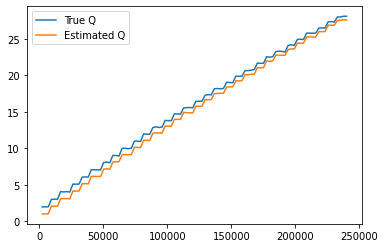

In [5]:
# plotting the true_q versus estimated_q 
true_q = pd.read_csv('/content/d3rlpy_logs/CQL-cartpole/true_q.csv',header=None)
estimated_q = pd.read_csv('/content/d3rlpy_logs/CQL-cartpole/estimated_q.csv',header=None)

true_q.columns = ['0', 'training steps', 'True Q']
estimated_q.columns = ['0', 'training steps', 'Estimated Q']

plt.plot(true_q['training steps'],true_q['True Q'])
plt.plot(estimated_q['training steps'],estimated_q['Estimated Q'])
plt.legend(['True Q','Estimated Q'])

## Optional Question 2

In [6]:

shutil.rmtree('/content/d3rlpy_logs/FQE_cartpole', ignore_errors=True)

fqe = DiscreteFQE(algo=cql)
result = fqe.fit(train_episodes,
   eval_episodes=test_episodes,
   n_epochs=25,
   scorers={
       "estimated_q": initial_state_value_estimation_scorer,
       'true_q': true_q_scorer

   },
   with_timestamp=False,
   experiment_name=f"FQE_cartpole")

2023-03-23 10:10:43 [debug    ] RoundIterator is selected.
2023-03-23 10:10:43 [info     ] Directory is created at d3rlpy_logs/FQE_cartpole
2023-03-23 10:10:43 [debug    ] Building models...
2023-03-23 10:10:43 [debug    ] Models have been built.
2023-03-23 10:10:43 [info     ] Parameters are saved to d3rlpy_logs/FQE_cartpole/params.json params={'action_scaler': None, 'batch_size': 100, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 0.0001, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 100, 'use_gpu': None, 'algorithm': 'DiscreteFQE', 'observation_shape': (4,), 'action_size': 2}


Epoch 1/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:10:48 [info     ] FQE_cartpole: epoch=1 step=767 epoch=1 metrics={'time_sample_batch': 0.0002800112752901995, 'time_algorithm_update': 0.004363541497400873, 'loss': 0.11944679572760593, 'time_step': 0.004740763207924257, 'estimated_q': 7.1762495040893555, 'true_q': 8.13200569152832} step=767
2023-03-23 10:10:48 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_767.pt


Epoch 2/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:10:52 [info     ] FQE_cartpole: epoch=2 step=1534 epoch=2 metrics={'time_sample_batch': 0.0002998441574315515, 'time_algorithm_update': 0.004581530681644922, 'loss': 0.1811660629025669, 'time_step': 0.004985082879992787, 'estimated_q': 14.262031555175781, 'true_q': 15.051218032836914} step=1534
2023-03-23 10:10:52 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_1534.pt


Epoch 3/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:10:57 [info     ] FQE_cartpole: epoch=3 step=2301 epoch=3 metrics={'time_sample_batch': 0.00025528661586159677, 'time_algorithm_update': 0.004197987304050888, 'loss': 0.2712045478175553, 'time_step': 0.004547048578672645, 'estimated_q': 20.211612701416016, 'true_q': 20.837234497070312} step=2301
2023-03-23 10:10:57 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_2301.pt


Epoch 4/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:02 [info     ] FQE_cartpole: epoch=4 step=3068 epoch=4 metrics={'time_sample_batch': 0.00027677599423245623, 'time_algorithm_update': 0.004595620691232296, 'loss': 0.3630293166256392, 'time_step': 0.004981142601102707, 'estimated_q': 26.37529945373535, 'true_q': 26.873394012451172} step=3068
2023-03-23 10:11:02 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_3068.pt


Epoch 5/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:07 [info     ] FQE_cartpole: epoch=5 step=3835 epoch=5 metrics={'time_sample_batch': 0.0003124878024184564, 'time_algorithm_update': 0.004791966006839757, 'loss': 0.4442579169427391, 'time_step': 0.00523100496115554, 'estimated_q': 32.177345275878906, 'true_q': 32.57752990722656} step=3835
2023-03-23 10:11:07 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_3835.pt


Epoch 6/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:11 [info     ] FQE_cartpole: epoch=6 step=4602 epoch=6 metrics={'time_sample_batch': 0.00025807210332877943, 'time_algorithm_update': 0.0042285465354869696, 'loss': 0.5211395916366292, 'time_step': 0.004570327806037594, 'estimated_q': 36.84368133544922, 'true_q': 37.12330627441406} step=4602
2023-03-23 10:11:11 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_4602.pt


Epoch 7/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:17 [info     ] FQE_cartpole: epoch=7 step=5369 epoch=7 metrics={'time_sample_batch': 0.00032429029919799643, 'time_algorithm_update': 0.005158849614229165, 'loss': 0.5942222432930367, 'time_step': 0.005605184114896334, 'estimated_q': 41.723838806152344, 'true_q': 41.91120910644531} step=5369
2023-03-23 10:11:17 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_5369.pt


Epoch 8/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:21 [info     ] FQE_cartpole: epoch=8 step=6136 epoch=8 metrics={'time_sample_batch': 0.0002554286723031214, 'time_algorithm_update': 0.00418794730185219, 'loss': 0.6600473627431083, 'time_step': 0.0045295007225742865, 'estimated_q': 46.27077102661133, 'true_q': 46.371437072753906} step=6136
2023-03-23 10:11:21 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_6136.pt


Epoch 9/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:25 [info     ] FQE_cartpole: epoch=9 step=6903 epoch=9 metrics={'time_sample_batch': 0.0002539350591706794, 'time_algorithm_update': 0.004111081711471936, 'loss': 0.7206041209704475, 'time_step': 0.004445275551647997, 'estimated_q': 50.1597900390625, 'true_q': 50.1656608581543} step=6903
2023-03-23 10:11:25 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_6903.pt


Epoch 10/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:30 [info     ] FQE_cartpole: epoch=10 step=7670 epoch=10 metrics={'time_sample_batch': 0.0003315774527180459, 'time_algorithm_update': 0.005079939592304255, 'loss': 0.7786937799235512, 'time_step': 0.0055975460166881414, 'estimated_q': 53.90446472167969, 'true_q': 53.80918502807617} step=7670
2023-03-23 10:11:30 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_7670.pt


Epoch 11/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:35 [info     ] FQE_cartpole: epoch=11 step=8437 epoch=11 metrics={'time_sample_batch': 0.00024405918345146726, 'time_algorithm_update': 0.004170360590053195, 'loss': 0.8338315749086799, 'time_step': 0.00449933595421106, 'estimated_q': 57.53150177001953, 'true_q': 57.336814880371094} step=8437
2023-03-23 10:11:35 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_8437.pt


Epoch 12/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:39 [info     ] FQE_cartpole: epoch=12 step=9204 epoch=12 metrics={'time_sample_batch': 0.0002471981023716336, 'time_algorithm_update': 0.004154877059618218, 'loss': 0.8837353267307445, 'time_step': 0.004490748844370537, 'estimated_q': 60.86469268798828, 'true_q': 60.63009262084961} step=9204
2023-03-23 10:11:39 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_9204.pt


Epoch 13/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:44 [info     ] FQE_cartpole: epoch=13 step=9971 epoch=13 metrics={'time_sample_batch': 0.0003823351207270616, 'time_algorithm_update': 0.005339343669050831, 'loss': 0.9278968277817162, 'time_step': 0.005877903884828013, 'estimated_q': 63.80010223388672, 'true_q': 63.55746841430664} step=9971
2023-03-23 10:11:44 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_9971.pt


Epoch 14/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:49 [info     ] FQE_cartpole: epoch=14 step=10738 epoch=14 metrics={'time_sample_batch': 0.0002534187446206303, 'time_algorithm_update': 0.004168239379644083, 'loss': 0.9710701916062041, 'time_step': 0.004509228304747342, 'estimated_q': 66.69529724121094, 'true_q': 66.35799407958984} step=10738
2023-03-23 10:11:49 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_10738.pt


Epoch 15/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:53 [info     ] FQE_cartpole: epoch=15 step=11505 epoch=15 metrics={'time_sample_batch': 0.00023263001224363642, 'time_algorithm_update': 0.004032685517332234, 'loss': 1.0094286490783018, 'time_step': 0.004338933405074178, 'estimated_q': 69.33177185058594, 'true_q': 68.9327163696289} step=11505
2023-03-23 10:11:53 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_11505.pt


Epoch 16/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:11:58 [info     ] FQE_cartpole: epoch=16 step=12272 epoch=16 metrics={'time_sample_batch': 0.0003316626244138397, 'time_algorithm_update': 0.005275901013589434, 'loss': 1.0455788370377277, 'time_step': 0.005755547283525728, 'estimated_q': 71.57179260253906, 'true_q': 71.13851928710938} step=12272
2023-03-23 10:11:58 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_12272.pt


Epoch 17/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:12:03 [info     ] FQE_cartpole: epoch=17 step=13039 epoch=17 metrics={'time_sample_batch': 0.00024809831124396494, 'time_algorithm_update': 0.004135743580088311, 'loss': 1.0799984756518384, 'time_step': 0.004461210740747166, 'estimated_q': 73.85597229003906, 'true_q': 73.364990234375} step=13039
2023-03-23 10:12:03 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_13039.pt


Epoch 18/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:12:07 [info     ] FQE_cartpole: epoch=18 step=13806 epoch=18 metrics={'time_sample_batch': 0.00024915083446278876, 'time_algorithm_update': 0.0041061768786692715, 'loss': 1.1107140643730993, 'time_step': 0.004436031003352716, 'estimated_q': 76.34149169921875, 'true_q': 75.84381866455078} step=13806
2023-03-23 10:12:07 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_13806.pt


Epoch 19/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:12:12 [info     ] FQE_cartpole: epoch=19 step=14573 epoch=19 metrics={'time_sample_batch': 0.00034927358217003135, 'time_algorithm_update': 0.0052346521126400225, 'loss': 1.1389160023223865, 'time_step': 0.0057203521007353824, 'estimated_q': 77.93251037597656, 'true_q': 77.3653335571289} step=14573
2023-03-23 10:12:12 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_14573.pt


Epoch 20/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:12:16 [info     ] FQE_cartpole: epoch=20 step=15340 epoch=20 metrics={'time_sample_batch': 0.00024141544158020418, 'time_algorithm_update': 0.004078432043341645, 'loss': 1.1666718744302491, 'time_step': 0.004396027349897282, 'estimated_q': 79.75344848632812, 'true_q': 79.12046813964844} step=15340
2023-03-23 10:12:16 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_15340.pt


Epoch 21/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:12:21 [info     ] FQE_cartpole: epoch=21 step=16107 epoch=21 metrics={'time_sample_batch': 0.000249577936324178, 'time_algorithm_update': 0.0041248509283948595, 'loss': 1.1887779419214466, 'time_step': 0.004450737419774977, 'estimated_q': 81.62677001953125, 'true_q': 80.95256805419922} step=16107
2023-03-23 10:12:21 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_16107.pt


Epoch 22/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:12:26 [info     ] FQE_cartpole: epoch=22 step=16874 epoch=22 metrics={'time_sample_batch': 0.0003984599256453334, 'time_algorithm_update': 0.005146913453839438, 'loss': 1.205216439887687, 'time_step': 0.005667043011999814, 'estimated_q': 82.87684631347656, 'true_q': 82.18305206298828} step=16874
2023-03-23 10:12:26 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_16874.pt


Epoch 23/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:12:30 [info     ] FQE_cartpole: epoch=23 step=17641 epoch=23 metrics={'time_sample_batch': 0.00024272379073201445, 'time_algorithm_update': 0.0041237654555418965, 'loss': 1.2263897872934266, 'time_step': 0.00446138699020525, 'estimated_q': 84.33952331542969, 'true_q': 83.58245086669922} step=17641
2023-03-23 10:12:30 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_17641.pt


Epoch 24/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:12:35 [info     ] FQE_cartpole: epoch=24 step=18408 epoch=24 metrics={'time_sample_batch': 0.00024765162610945523, 'time_algorithm_update': 0.0041576656555414515, 'loss': 1.2420068189654756, 'time_step': 0.004484550272159502, 'estimated_q': 85.5594482421875, 'true_q': 84.69911193847656} step=18408
2023-03-23 10:12:35 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_18408.pt


Epoch 25/25:   0%|          | 0/767 [00:00<?, ?it/s]

2023-03-23 10:12:40 [info     ] FQE_cartpole: epoch=25 step=19175 epoch=25 metrics={'time_sample_batch': 0.00033138130914123616, 'time_algorithm_update': 0.004872736128865507, 'loss': 1.2578034573192118, 'time_step': 0.005324915148599518, 'estimated_q': 86.5779800415039, 'true_q': 85.69486236572266} step=19175
2023-03-23 10:12:40 [info     ] Model parameters are saved to d3rlpy_logs/FQE_cartpole/model_19175.pt


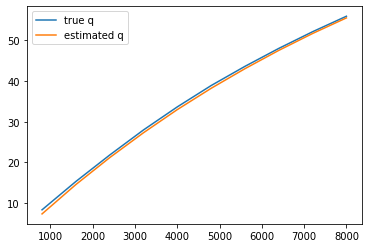

In [25]:
# plotting true_q versus estimated_q for FQE
fqe_true_q = pd.read_csv("/content/d3rlpy_logs/FQE_cartpole/true_q.csv",header=None)
fqe_estimated_q = pd.read_csv("/content/d3rlpy_logs/FQE_cartpole/estimated_q.csv",header=None)

fqe_true_q.columns = ["0", "training steps", "true q"]
fqe_estimated_q.columns = ["0", "training steps", "estimated q"]

plt.plot(fqe_true_q['training steps'],fqe_true_q['true q'])
plt.plot(fqe_estimated_q['training steps'],fqe_estimated_q['estimated q'])
plt.legend(['true q','estimated q'])